In [1]:
from pandas import read_csv, DataFrame,concat,notnull,isnull,Series
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
#from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
data=read_csv("output_and_def_oct28.csv")
data.index=data['scenario_number']
flooded=read_csv("people_flooded.csv")
flooded.index=flooded['scenario_number']
flooded=flooded.drop('scenario_number',axis=1)

In [3]:
%matplotlib inline

In [4]:
data.rename(columns={'PARLIAMENT BRIDGE 3(150.0000)':'PARLIAMENT', 'KOTTE ELA NORTH(0.0000)':'KOTTE', 
                     'KIRILLAPONE2(771.0500)':'KIRILLAPONE2', 'PARLIAMENT_UPPER_REACH(1803.5500)':'PARLIAMENT_UPPER_REACH', 
         'TALANGAMA(3416.0000)':'TALANGAMA', 'KIRILLAPONE2(1388.0300)':'KIRILLAPONE22', 'TORRINGTON CNL(81.6800)':'TORRINGTON', 
         'TORRINGTON_B01(33.0600)':'TORRINGTON_B01', 'MAHAWATTA TO HEEN ELA(349.6500)':'MAHAWATTA', 
         'MAHAWATTA ELA(49.9900)':'MAHAWATTA2', 'WELLAWATTA CNL(0.0000)':'WELLAWATTA', 'DEMATAGODA ELA(0.0000)':'DEMATAGODA', 
         'DEMATAGODA ELA 2(3414.8899)':'DEMATAGODA2', 'ST. SEBASTIAN NORTH CANAL(1400.8700)':'SEBASTIAN2',
         'ST. SEBASTIAN SOUTH CANAL(-75.0000)':'SEBASTIAN3', 'MAIN DRAIN(1094.8000)':'MAIN',
         'DEHIWARA CNL(1003.8000)':'DEHIWARA', 'KIRILLAPONE3(2156.1499)':'KIRILLAPONE3',
         'KIRILLAPONE2(934.0800)':'KIRILLAPONE23', 'TORRINGTON_B01(33.0600).1':'TORRINGTON_B012',
         'SERPENTINE(40.0000)':'SERPENTINE', 'ST.SEBASTIAN_SOUTH_DIVERSION(200.0000)':'SEBASTIAN_SOUTH_DIVERSION', 
         'ST. SEBASTIAN SOUTH CANAL(1025.1801)':'SEBASTIAN', 'MAIN DRAIN(1177.1600)':'MAIN2'}, inplace=True)


In [5]:
xcols=['PARLIAMENT', 'SEBASTIAN','KOTTE', 'KIRILLAPONE2', 'PARLIAMENT_UPPER_REACH', 'TALANGAMA', 'KIRILLAPONE22', 'TORRINGTON', 
       'TORRINGTON_B01', 'MAHAWATTA', 'MAHAWATTA2', 'WELLAWATTA', 'DEMATAGODA', 'DEMATAGODA2', 'SEBASTIAN2', 'SEBASTIAN3', 
       'MAIN', 'DEHIWARA', 'KIRILLAPONE3', 'KIRILLAPONE23', 'TORRINGTON_B012', 'SERPENTINE', 'SEBASTIAN_SOUTH_DIVERSION', 
       'MAIN2']
x=data.ix[:,xcols].copy()
selectt=isnull(x).sum(axis=1)==0
x=x.ix[selectt,:]

In [45]:
np.shape(x)

(272, 24)

In [46]:
results = PCA(x)

In [47]:
100*results.fracs

array([  9.71459082e+01,   1.70168531e+00,   8.38644487e-01,
         1.51701389e-01,   7.85119693e-02,   5.44894461e-02,
         1.17052572e-02,   7.09475433e-03,   5.85362283e-03,
         1.79532158e-03,   1.39983285e-03,   5.70847340e-04,
         3.53622531e-04,   1.26041111e-04,   6.82900239e-05,
         3.65835210e-05,   2.26253791e-05,   1.88740664e-05,
         7.90965493e-06,   3.46699511e-06,   1.62659798e-06,
         5.44862972e-07,   1.93230430e-08,   2.60619308e-35])

In [48]:
a=results.Y

Selects only 2 cross sections

In [6]:
varin1='PARLIAMENT'
varin2='SEBASTIAN'
subdata=data[[varin1, varin2, 'return_period','wetland_loss','climate_change','runoff','bndconditions','scenario_number']]
subdata=concat([subdata,flooded],axis=1)
subdata.rename(columns={'Estimated Population Exposed using GN method': 'Pop','share of Total Population using A2'
                        : 'share'}, inplace=True)

## calculates losses

In [7]:
pop_multiplier=2.8*0.3

In [8]:
def calccost(pop_exposed,gdp_gr,gdp_per_capita_2013,pop_multiplier):
    cost=pop_exposed*gdp_per_capita_2013*(1+gdp_gr)**(2040-2013)*pop_multiplier
    return cost


In [9]:
#GDP per capita 2013 in constant lkr
gdp_per_capita_2013=160*10**3
gdp_per_capita_2010=128*10**3

gdp_per_capita_2040=gdp_per_capita_2013
#gdp_per_capita_2040=gdp_per_capita_2013*(1.05)**(2040-2013)

In [10]:
subdata.ix[notnull(subdata['share']),'cost']=calccost(subdata.ix[notnull(subdata['share']),'Pop'],0,gdp_per_capita_2040,pop_multiplier)
subdata.ix[notnull(subdata['share']),'costlog']=np.log(subdata.ix[notnull(subdata['share']),'cost'])


In [11]:
subdata.ix[notnull(subdata['share']),:]

,PARLIAMENT,SEBASTIAN,return_period,wetland_loss,climate_change,runoff,bndconditions,scenario_number,Pop,share,cost,costlog
scenario_number,,,,,,,,,,,,
92,1.2238,1.2578,5,0,0,0.4,1,92,59038.07,0.074733,7.934717e+09,22.794513
128,NaN,0.6566,5,50,0,0.4,1,128,64307.34,0.081403,8.642906e+09,22.880005
164,1.5552,1.2746,5,100,0,0.4,1,164,74107.43,0.093808,9.960039e+09,23.021847
272,1.8580,1.6019,25,0,0,0.4,1,272,104138.80,0.131823,1.399625e+10,23.362056
308,2.0474,1.7636,25,50,0,0.4,1,308,122188.60,0.154671,1.642215e+10,23.521897
344,NaN,0.6566,25,100,0,0.4,1,344,166367.40,0.210594,2.235978e+10,23.830530
362,2.2065,1.9444,50,0,0,0.4,1,362,138615.20,0.175464,1.862988e+10,23.648033
398,2.4725,2.1809,50,50,0,0.4,1,398,175558.60,0.222229,2.359508e+10,23.884304
434,2.9744,2.7266,50,100,0,0.4,1,434,226590.40,0.286827,3.045375e+10,24.139475


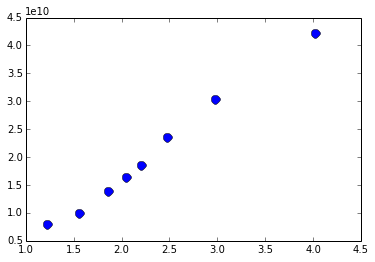

In [12]:
plt.plot(subdata['PARLIAMENT'],subdata['cost'],marker='o',markersize=9,linestyle='None')

## predicts missing water level data points

In [13]:
formula=varin1+" ~ return_period + wetland_loss + climate_change + runoff  + bndconditions"
olsmodel=sm.ols(formula,data=subdata).fit()
res=olsmodel.params
print(res)

Intercept         0.347220
return_period     0.032135
wetland_loss      0.004746
climate_change    0.277020
runoff            0.676937
bndconditions     0.341792
dtype: float64


In [14]:
predictions=olsmodel.predict(subdata)
subdata.loc[subdata[varin1].isnull().values,varin1]=predictions[subdata[varin1].isnull().values]

In [15]:
formula=varin2+" ~ return_period + wetland_loss + climate_change + runoff  + bndconditions"
olsmodel2=sm.ols(formula,data=subdata).fit()
res2=olsmodel2.params
predictions2=olsmodel2.predict(subdata)
subdata.loc[subdata[varin2].isnull().values,varin2]=predictions2[subdata[varin2].isnull().values]

## predicts damages based on a few points using water level

In [16]:
subdata['logPARLIAMENT']=np.log(subdata['PARLIAMENT'])
subdata['logSEBASTIAN']=np.log(subdata['SEBASTIAN'])

In [17]:
formula="costlog ~ logPARLIAMENT"
damagemodel=sm.ols(formula,data=subdata).fit()
res=damagemodel.params
print(res)

Intercept        22.453457
logPARLIAMENT     1.515024
dtype: float64


In [18]:
damagemodel.summary()

C:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1205: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                costlog   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     405.4
Date:                Mon, 12 Jan 2015   Prob (F-statistic):           3.86e-08
Time:                        18:12:26   Log-Likelihood:                 12.048
No. Observations:                  10   AIC:                            -20.10
Df Residuals:                       8   BIC:                            -19.49
Df Model:                           1                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        22.4535      0.060    371.695      0.000        22.314    22.593
logPARLIAMENT     1.5150      0.075     20.135      0.000         1.342     1.689
==============================================================================
Omnibus:                        1.624   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                0.525
Skew:                           0.560   Prob(JB):                        0.769
Kurtosis:                       2.937   Cond. No.                         4.61
==============================================================================
"""

In [19]:
predicted_damages=damagemodel.predict(subdata)
subdata.loc[subdata['costlog'].isnull().values,'costlog']=predicted_damages[subdata['costlog'].isnull().values]

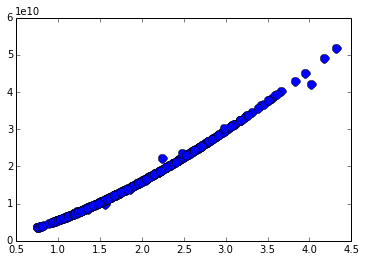

In [20]:
subdata['costestimated']=np.exp(subdata['costlog'])
plt.plot(subdata['PARLIAMENT'],subdata['costestimated'],marker='o',markersize=9,linestyle='None')

## this is to find the scenar number that corresponds to the flood maps

In [25]:
compare=[sum(s) for s in subdata[['return_period','wetland_loss','climate_change','runoff','bndconditions']].values==[50,0,0,0.4,1]]
select=[s==5 for s in compare]

subdata.ix[select,'scenario_number']



scenario_number
362                362
Name: scenario_number, dtype: int64

In [26]:
len(subdata)

450

## calculates annual losses

In [21]:
from scipy.optimize import fsolve
from scipy.interpolate import InterpolatedUnivariateSpline

nb_people_exposed=0.8*10**6
R=gdp_per_capita_2013*nb_people_exposed


def annual_losses(x):
    cost=x.ix[:,['return_period','costestimated']].copy()
    # choose extrapolation type. spline order: 1 linear, 2 quadratic, 3 cubic ... 
    order = 1 
    # do extrapolation
    s = InterpolatedUnivariateSpline(cost['return_period'], cost['costestimated'], k=order)
    
    zerocost=DataFrame({'return_period':[100,10000],'costestimated':[s(100),s(100)]})
    cost=concat([zerocost,cost])
    cost.sort(columns='return_period', inplace=True)
    cost.index=range(len(cost))
    cost['costestimated']=cost['costestimated'].astype(float)
    cost['frequency']=1/cost['return_period']
    inte=0
    for i in range(1,len(cost)):
        trapeze =(cost.loc[i-1,'frequency']-cost.loc[i,'frequency'])*(cost.loc[i,'costestimated']+cost.loc[i-1,'costestimated'])/2
        inte += trapeze
    inte += cost.loc[len(cost)-1,'costestimated']*cost.loc[len(cost)-1,'frequency']
    return inte


In [22]:
choose_one=subdata.loc[(subdata['wetland_loss']==0)
            &(subdata['climate_change']==0)
            &(subdata['runoff']==0.4)
            &(subdata['bndconditions']==1),:]

In [23]:
choose_one

,PARLIAMENT,SEBASTIAN,return_period,wetland_loss,climate_change,runoff,bndconditions,scenario_number,Pop,share,cost,costlog,logPARLIAMENT,logSEBASTIAN,costestimated
scenario_number,,,,,,,,,,,,,,,
2,1.0505,1.1056,2,0,0,0.4,1,2,NaN,NaN,NaN,22.528097,0.049266,0.100388,6.078942e+09
92,1.2238,1.2578,5,0,0,0.4,1,92,59038.07,0.074733,7934716608,22.794513,0.201961,0.229364,7.934717e+09
182,1.4488,1.3691,10,0,0,0.4,1,182,NaN,NaN,NaN,23.015131,0.370736,0.314154,9.893369e+09
272,1.8580,1.6019,25,0,0,0.4,1,272,104138.80,0.131823,13996254720,23.362056,0.619501,0.471190,1.399625e+10
362,2.2065,1.9444,50,0,0,0.4,1,362,138615.20,0.175464,18629882880,23.648033,0.791408,0.664953,1.862988e+10


In [24]:
without_project=choose_one.copy()
without_project.ix[without_project['return_period']==25,'Pop']=182517.1
without_project.ix[without_project['return_period']==50,'Pop']=217485.4

In [82]:
without_project['Pop']/choose_one['Pop']

scenario_number
2                       NaN
92                 1.000000
182                     NaN
272                1.752633
362                1.568987
Name: Pop, dtype: float64

In [70]:
annual_losses(choose_one)

4671215200.3886385

In [25]:
cost=choose_one.ix[:,['return_period','costestimated']].copy()
# choose extrapolation type. spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1 
# do extrapolation
s = InterpolatedUnivariateSpline(cost['return_period'], cost['costestimated'], k=order)

zerocost=DataFrame({'return_period':[100,200],'costestimated':[s(100),s(100)]})
cost=concat([zerocost,cost])
cost.sort(columns='return_period', inplace=True)
cost.index=range(len(cost))
cost['costestimated']=cost['costestimated'].astype(float)

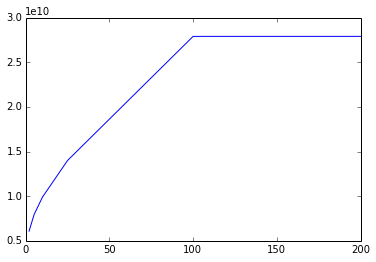

In [26]:
plt.plot(cost['return_period'],cost['costestimated'])

In [27]:
charac_col=['wetland_loss','climate_change','runoff','bndconditions']
annloss=subdata.groupby(charac_col).apply(lambda x:annual_losses(x))
charac=subdata.groupby(charac_col).apply(lambda x:x[charac_col].head(1))
scenar=subdata.groupby(charac_col).apply(lambda x:x['scenario_number'].head(1))

In [28]:
new_data=concat([scenar,charac],axis=1)
new_data.index=range(len(new_data))

In [29]:
annloss.index=range(len(annloss))
new_data['annuallosses']=annloss/10**9

In [30]:
new_data['wetland_loss'].unique()

array([  0,  10,  50,  70, 100], dtype=int64)

In [31]:
def risk_averse_losses(x,wetland_loss):
    def calc_int(c,wetland_loss):
        subcost=cost.ix[cost['wetland_loss']==wetland_loss,:].copy()
        s = InterpolatedUnivariateSpline(subcost['return_period'], subcost['costestimated'], k=1)
        zerocost=DataFrame({'return_period':[100,10000],'costestimated':[s(100),s(100)]})
        subcost=concat([zerocost,subcost])
        subcost.sort(columns='return_period', inplace=True)
        subcost['frequency']=1/subcost['return_period']
        subcost['costestimated']=subcost['costestimated'].astype(float)
        subcost.index=range(len(subcost))
        subcost['utility']=np.log(R-subcost['costestimated']+c)
        inte=0
        for i in range(1,len(subcost)):
            trapeze =(subcost.loc[i-1,'frequency']-subcost.loc[i,'frequency'])*(subcost.loc[i,'utility']+subcost.loc[i-1,'utility'])/2
            inte += trapeze
        inte += subcost.loc[len(subcost)-1,'utility']*subcost.loc[len(subcost)-1,'frequency']
        return inte
    cost=x.ix[:,['return_period','costestimated','wetland_loss']].copy()    
    func = lambda c : calc_int(c,100)-calc_int(0,wetland_loss)
    c_initial_guess = np.mean(cost['costestimated'])
    result = fsolve(func, c_initial_guess)
    return result[0]


In [32]:
charac_col2=['climate_change','runoff','bndconditions']
charac=subdata.groupby(charac_col2).apply(lambda x:x[charac_col2].head(1))
bb=DataFrame(charac.values,columns=charac_col2)
new_data2=DataFrame()
for wetland_loss in [0,10,50,70]:
    vo=subdata.groupby(charac_col2).apply(lambda x:risk_averse_losses(x,wetland_loss))
    scenar=subdata.groupby(charac_col2).apply(lambda x:x.ix[(x['wetland_loss']==wetland_loss)&(x['return_period']==5),'scenario_number'])
    aa=DataFrame({'scenario_number':scenar.values,'option_value':vo.values,'wetland_kept':[100-wetland_loss]*len(scenar.values)})
    new_data2=new_data2.append(concat([bb,aa],axis=1),ignore_index=True)
new_data2.index=range(len(new_data2))



In [33]:
new_data2.describe()

,climate_change,runoff,bndconditions,option_value,scenario_number,wetland_kept
count,72.000000,72.000000,72.000000,7.200000e+01,72.00000,72.000000
mean,1.000000,0.500000,0.500000,3.982265e+09,126.50000,67.500000
std,0.822226,0.082223,0.503509,2.222269e+09,20.92845,28.814609
min,0.000000,0.400000,0.000000,1.191969e+07,91.00000,30.000000
25%,0.000000,0.400000,0.000000,2.535500e+09,108.75000,45.000000
50%,1.000000,0.500000,0.500000,3.664094e+09,126.50000,70.000000
75%,2.000000,0.600000,1.000000,5.402816e+09,144.25000,92.500000
max,2.000000,0.600000,1.000000,8.856362e+09,162.00000,100.000000


In [135]:
new_data2.groupby('wetland_kept').mean()

,climate_change,runoff,bndconditions,option_value,scenario_number
wetland_kept,,,,,
30,1,0.5,0.5,1.486907e+10,153.5
50,1,0.5,0.5,1.615308e+10,135.5
90,1,0.5,0.5,1.711155e+10,117.5
100,1,0.5,0.5,1.739468e+10,99.5


In [145]:
formula="annuallosses ~ wetland_loss + climate_change + runoff  + bndconditions"
olsmodel1=sm.ols(formula,data=new_data).fit()
res1=olsmodel1.params
table=anova_lm(olsmodel1)
table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
table=table.sort(['sum_sq'],ascending=False)

In [136]:
table

,df,sum_sq,mean_sq,F,PR(>F),sum_sq_pc
climate_change,1,143.144195,143.144195,832.620627,1.105791e-45,0.401989
wetland_loss,1,99.227106,99.227106,577.170002,1.186191e-39,0.278658
bndconditions,1,90.478836,90.478836,526.284319,3.569670e-38,0.254090
Residual,85,14.613206,0.171920,NaN,NaN,0.041038
runoff,1,8.626245,8.626245,50.175903,3.803224e-10,0.024225


In [129]:
new_data.to_csv("C:\\Users\\julierozenberg\\Documents\\GitHub\\EMAworkbench\\src\\srilankaparlagg.csv",index=False)


In [130]:
new_data['wetland_loss'].unique()

array([  0,  10,  50,  70, 100], dtype=int64)

C:\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1236: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


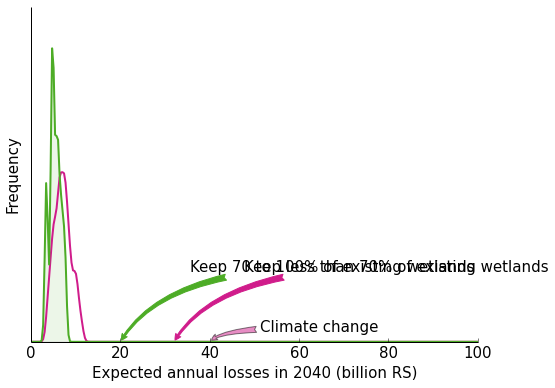

In [34]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

select=new_data['wetland_loss']>30

density = gaussian_kde(new_data.ix[select,'annuallosses'])
xs = np.linspace(0,100,num=300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs),linewidth=2,color='#d01c8b')
plt.annotate('Keep less than 70% of existing wetlands', xy=(32, density(32)),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='#d01c8b', ec='#d01c8b',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
high_losses=xs>=35
ax.fill_between(xs[high_losses], 0, density(xs[high_losses]),facecolor='#d01c8b',alpha=0.5)
plt.annotate('Climate change', xy=(xs[120], 0.3*density(xs[120])),  xycoords='data',
                    xytext=(50, 10), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='#d01c8b', ec='black',
                                    alpha=0.5,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
#ax.fill_between(xs, 0, density(xs),facecolor='#d01c8b',alpha=0.1)

select2=new_data['wetland_loss']<30

density2 = gaussian_kde(new_data.ix[select2,'annuallosses'])
density2.covariance_factor = lambda : .25
density2._compute_covariance()

plt.plot(0,max(density2(xs)),color='white')

plt.xlabel('Expected annual losses in 2040 (billion RS)')
plt.ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
plt.savefig('distrib_annual_losses0.png',bbox_inches="tight",dpi=500)


plt.plot(xs,density2(xs),linewidth=2,color='#4dac26')
plt.annotate('Keep 70 to 100% of existing wetlands', xy=(20, density2(20)),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='#4dac26', ec='#4dac26',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
ax.fill_between(xs, 0, density2(xs),facecolor='#4dac26',alpha=0.1)


plt.savefig('distrib_annual_losses.png',bbox_inches="tight",dpi=500)

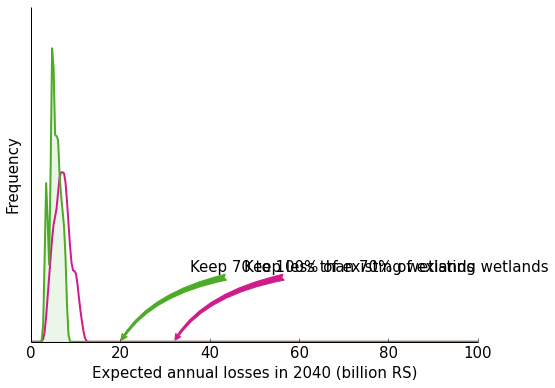

In [35]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

select=new_data['wetland_loss']>30

density = gaussian_kde(new_data.ix[select,'annuallosses'])
xs = np.linspace(0,100,num=300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs),linewidth=2,color='#d01c8b')
plt.annotate('Keep less than 70% of existing wetlands', xy=(32, density(32)),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='#d01c8b', ec='#d01c8b',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )

select2=new_data['wetland_loss']<30

density2 = gaussian_kde(new_data.ix[select2,'annuallosses'])
density2.covariance_factor = lambda : .25
density2._compute_covariance()

plt.plot(0,max(density2(xs)),color='white')

plt.xlabel('Expected annual losses in 2040 (billion RS)')
plt.ylabel('Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])


plt.plot(xs,density2(xs),linewidth=2,color='#4dac26')
plt.annotate('Keep 70 to 100% of existing wetlands', xy=(20, density2(20)),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='#4dac26', ec='#4dac26',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
ax.fill_between(xs, 0, density2(xs),facecolor='#4dac26',alpha=0.1)


plt.savefig('distrib_annual_losses.png',bbox_inches="tight",dpi=500)

## risk premium

In [146]:
value1=np.mean(new_data.ix[select,'annuallosses'])-np.mean(new_data.ix[~select,'annuallosses'])
print(value1)

1.84210274466


In [147]:
value2=np.mean(new_data.ix[select,'riskannloss'])-np.mean(new_data.ix[~select,'riskannloss'])
print(value2)

-4.59422121844e-07


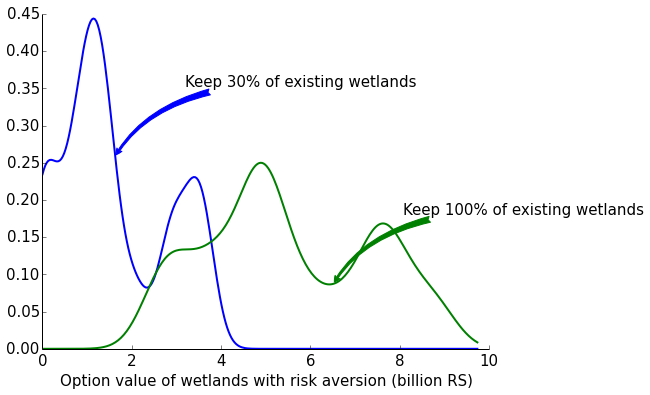

In [36]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(8,6))
ax=plt.subplot(111)

select=new_data2['wetland_kept']==30

density = gaussian_kde(new_data2.ix[select,'option_value']/10**9)
xs = np.linspace(0,max(new_data2['option_value']/10**9*1.1),num=300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs),linewidth=2,color='blue')
plt.annotate('Keep 30% of existing wetlands', xy=(xs[50], density(xs[50])),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='blue', ec='blue',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )

select2=new_data2['wetland_kept']==100


density = gaussian_kde(new_data2.ix[select2,'option_value']/10**9)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs),linewidth=2,color='green')
plt.annotate('Keep 100% of existing wetlands', xy=(xs[200], density(xs[200])),  xycoords='data',
                    xytext=(70, 70), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc='green', ec='green',
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=60"),
                        )
plt.xlabel('Option value of wetlands with risk aversion (billion RS)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.savefig('option_value.png',bbox_inches="tight",dpi=500)

# performs anova for each return period

In [28]:
anova_all=DataFrame(columns=['wetland_loss', 'climate_change', 'runoff', 'bndconditions'])
anova_all2=DataFrame(columns=['wetland_loss', 'climate_change', 'runoff', 'bndconditions'])

for rp in subdata['return_period'].unique():
    subsubdata=subdata.ix[subdata['return_period']==rp,:]
    formula=varin1+" ~ wetland_loss + climate_change + runoff  + bndconditions"
    olsmodel=sm.ols(formula,data=subsubdata).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=100*table['sum_sq']/table['sum_sq'].sum()
    table=table.sort(['sum_sq'],ascending=False)
    tablet=table.transpose()
    inter=tablet.loc[['sum_sq_pc']]
    inter2=tablet.loc[['sum_sq']]
    inter.index=[rp]
    inter2.index=[rp]
    anova_all=anova_all.append(inter)
    anova_all2=anova_all2.append(inter2)
    print("the return period is "+str(rp))
    print(table)

the return period is 2
                df    sum_sq   mean_sq           F        PR(>F)  sum_sq_pc
climate_change   1  2.556518  2.556518  174.363227  2.685197e-22  31.603239
bndconditions    1  2.373559  2.373559  161.884797  2.209573e-21  29.341531
wetland_loss     1  1.741900  1.741900  118.803535  8.099315e-18  21.533076
Residual        85  1.246272  0.014662         NaN           NaN  15.406203
runoff           1  0.171168  0.171168   11.674248  9.743546e-04   2.115951
the return period is 5
                df    sum_sq   mean_sq            F        PR(>F)  sum_sq_pc
climate_change   1  3.623710  3.623710  1520.162465  5.166972e-56  42.239209
bndconditions    1  2.466246  2.466246  1034.601121  2.332396e-49  28.747410
wetland_loss     1  2.104689  2.104689   882.926195  1.141411e-46  24.532973
Residual        85  0.202620  0.002384          NaN           NaN   2.361809
runoff           1  0.181755  0.181755    76.247070  1.884031e-13   2.118600
the return period is 10
            

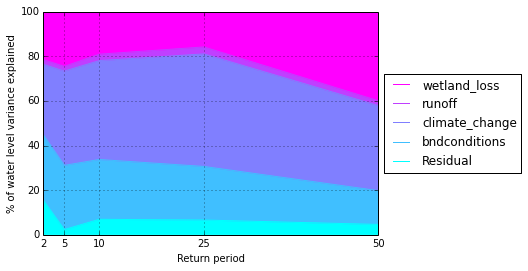

In [29]:
#anova_all.columns=['Wetland loss','Run-off','Climate Change','Boundary Conditions','Residual']
f1 = plt.figure()
anova_all.plot(ylim=(0,100),sort_columns=False,kind='area',colormap='cool',ax=f1.gca())
ax=f1.gca()
plt.xticks(anova_all.index.astype(int),list(anova_all.index.astype(int).astype(str)))
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('% of water level variance explained')
plt.xlabel('Return period')

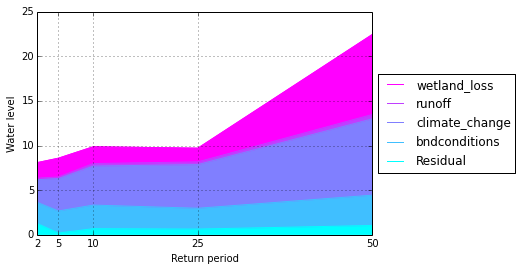

In [30]:
#anova_all2.columns=['Wetland loss','Run-off','Climate Change','Boundary Conditions','Residual']
f1 = plt.figure()
anova_all2.plot(kind='area',colormap='cool',ax=f1.gca())
ax=f1.gca()
plt.xticks(anova_all2.index.astype(int),list(anova_all2.index.astype(int).astype(str)))
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1],labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Water level')
plt.xlabel('Return period')

In [31]:
labels=DataFrame(anova_all.columns.copy(),index=anova_all.columns,columns=['label'])

In [32]:
labels.ix['bndconditions',:]="Previous rainfall (best to worst conditions)"
labels.ix['climate_change',:]="Climate Change (no cc to high cc)"
labels.ix['runoff',:]="Urban development (green or conventional)"
labels.ix['wetland_loss',:]="Wetland loss (0 to 100%)"
labels.ix['Residual',:]=""

In [33]:
labels.ix[:,'colors']=["white","#3300FF","#009999","#FF6600","#00FF99"]

In [34]:
newdatamax=subdata.groupby('return_period').apply(lambda x:x['PARLIAMENT'].max())
newdatamin=subdata.groupby('return_period').apply(lambda x:x['PARLIAMENT'].min())

In [35]:
newdata=anova_all.copy()
for i in anova_all.columns:
    newdata[i]=(newdatamax-newdatamin)/100*anova_all[i]

new_line=newdatamin
for i in anova_all.columns:
    new_lineprev=new_line
    new_line+=1/100*anova_all[i]*(newdatamax-newdatamin)
    plt.plot(x,new_line,color='black',linestyle=':')
    ax.fill_between(x, new_lineprev, new_line, alpha=0.8,facecolor=labels.ix[i,'colors'])
    plt.text(53,1/2*(new_line[50]+new_lineprev[50]),labels.ix[i,'label'])

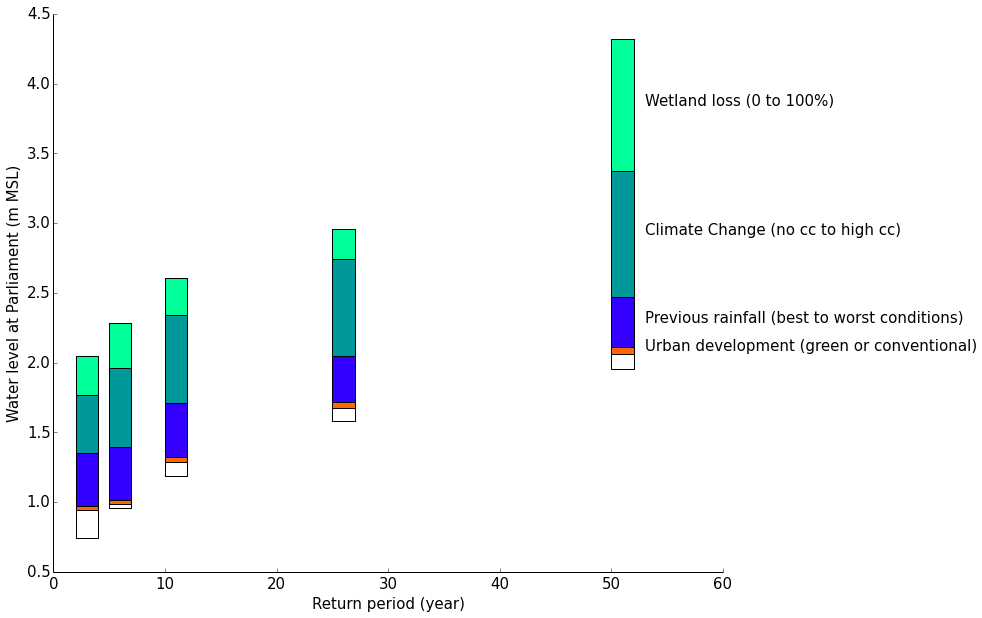

In [36]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(12,10))
x=[2,5,10,25,50]
ax=plt.subplot(111)
prev=newdatamin.values
for i in ['Residual','runoff','bndconditions','climate_change','wetland_loss']:
    plt.bar(x,newdata.ix[:,i],color=labels.ix[i,'colors'],bottom=prev,width=2)
    plt.text(53,1/2*(prev[4]+prev[4]+newdata.ix[50,i]),labels.ix[i,'label'])
    prev+=newdata.ix[:,i].values
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel("Return period (year)")
plt.ylabel("Water level at Parliament (m MSL)")
plt.title("")
plt.savefig('inputs_water_level_parliament.png',bbox_inches="tight",dpi=500)

## Looks at max water level at parliament for each RP

In [40]:
subdata.columns

Index(['PARLIAMENT', 'SEBASTIAN', 'return_period', 'wetland_loss', 'climate_change', 'runoff', 'bndconditions', 'scenario_number', 'Pop', 'share', 'cost'], dtype='object')

In [65]:
subdata.ix[notnull(subdata['share']),:]

,PARLIAMENT,SEBASTIAN,return_period,wetland_loss,climate_change,runoff,bndconditions,scenario_number,Pop,share,cost
scenario_number,,,,,,,,,,,
92,1.223800,1.2578,5,0,0,0.4,1,92,59038.07,0.074733,4.252069e+09
128,1.357742,0.6566,5,50,0,0.4,1,128,64307.34,0.081403,4.631575e+09
164,1.555200,1.2746,5,100,0,0.4,1,164,74107.43,0.093808,5.337402e+09
272,1.858000,1.6019,25,0,0,0.4,1,272,104138.80,0.131823,7.500337e+09
308,2.047400,1.7636,25,50,0,0.4,1,308,122188.60,0.154671,8.800328e+09
344,2.237718,0.6566,25,100,0,0.4,1,344,166367.40,0.210594,1.198220e+10
362,2.206500,1.9444,50,0,0,0.4,1,362,138615.20,0.175464,9.983413e+09
398,2.472500,2.1809,50,50,0,0.4,1,398,175558.60,0.222229,1.264417e+10
434,2.974400,2.7266,50,100,0,0.4,1,434,226590.40,0.286827,1.631961e+10


In [ ]:
#subdata.ix[notnull(subdata['share']),:]
select=(subdata['PARLIAMENT']>3.7)
subdata.ix[notnull(subdata['share'])&(subdata['return_period']==50),['wetland_loss', 'climate_change', 'runoff', 'bndconditions']]



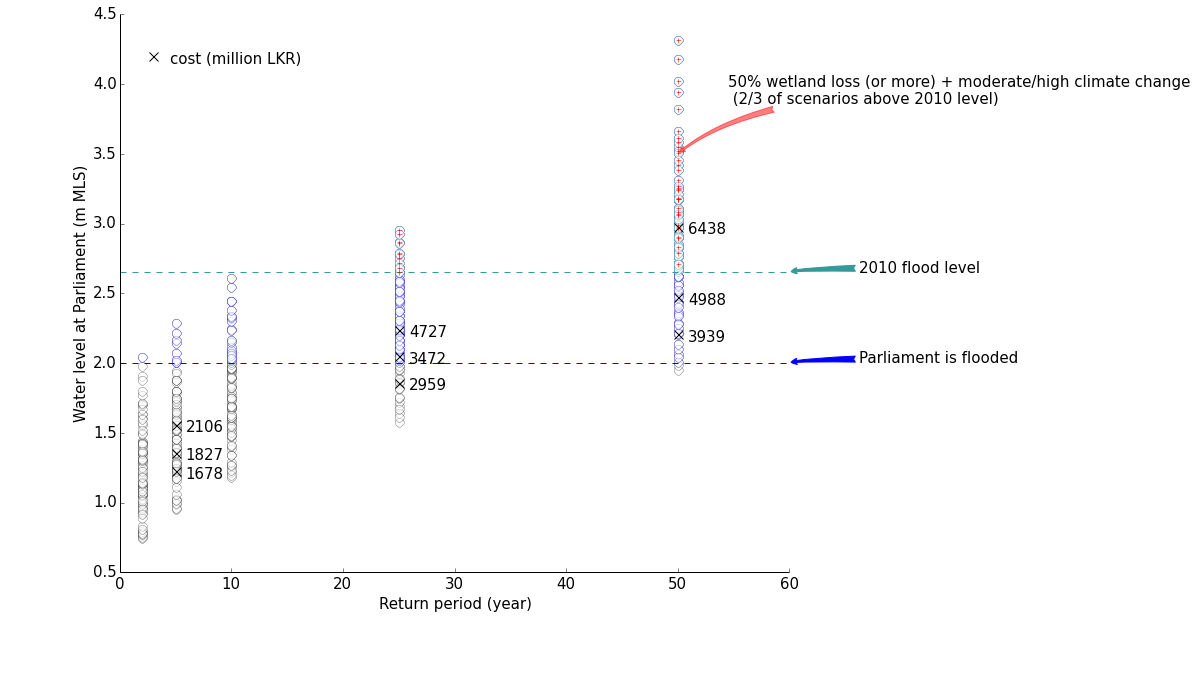

In [39]:
flood2010=2.65
color1="#0000FF"
color2='#339999'
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(12,10))
ax=plt.subplot(111)

for rp in subdata['return_period'].unique():
    subsubdata=subdata.ix[subdata['return_period']==rp,:]
    plt.plot([rp]*len(subsubdata),subsubdata['PARLIAMENT'],marker='o',markersize=9,linestyle='None',color='white',alpha=0.5,clip_on=False)
    subsubdata2=subdata.ix[(subdata['return_period']==rp)&(subdata['PARLIAMENT']>2),:]
    plt.plot([rp]*len(subsubdata2),subsubdata2['PARLIAMENT'],marker='o',markersize=9,linestyle='None',color='white',alpha=0.5,markeredgecolor=color1,clip_on=False)
    subsubdata3=subdata.ix[(subdata['return_period']==rp)&(subdata['PARLIAMENT']>flood2010),:]
    plt.plot([rp]*len(subsubdata3),subsubdata3['PARLIAMENT'],marker='o',markersize=9,linestyle='None',color='white',alpha=0.5,markeredgecolor=color2,clip_on=False)
plt.plot([0,60],[2]*2,color=color1,linestyle='--')
plt.annotate('Parliament is flooded', xy=(60, 2),  xycoords='data',
                    xytext=(70, 0), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=color1, ec=color1,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )
plt.plot([0,60],[flood2010]*2,color=color2,linestyle='--')
plt.annotate('2010 flood level', xy=(60, flood2010),  xycoords='data',
                    xytext=(70, 0), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=color2, ec=color2,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )
#(subdata['PARLIAMENT']>flood2010)&
select=(subdata['PARLIAMENT']>flood2010)&(subdata['climate_change']>0.5)&(subdata['wetland_loss']>=50)
plt.plot(subdata.ix[select,'return_period'],subdata.ix[select,'PARLIAMENT'],marker='+',markersize=5,linestyle='None',color='red',clip_on=False)

plt.annotate('50% wetland loss (or more) + moderate/high climate change\n (2/3 of scenarios above 2010 level)', xy=(50, 3.5),  xycoords='data',
                    xytext=(50, 50), textcoords='offset points',
                    size=15,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc="red", ec="red", alpha=0.5,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )

plt.plot(3,4.2,marker='x',markersize=9,markeredgewidth=1,linestyle='None',color='black',clip_on=False)
plt.text(4.5,4.15,"cost (million LKR)")
for i in subdata.ix[notnull(subdata['cost']),:].index:
    plt.plot(subdata.ix[i,'return_period'],subdata.ix[i,'PARLIAMENT'],marker='x',markersize=9,markeredgewidth=1,linestyle='None',color='black',clip_on=False)
    plt.text(subdata.ix[i,'return_period']+1,subdata.ix[i,'PARLIAMENT']-0.05,str(int(round(subdata.ix[i,'cost']/10**6))))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xlabel("Return period (year)")
plt.ylabel("Water level at Parliament (m MLS)")

#plt.savefig('water_level_parliament.png',bbox_inches="tight",dpi=500)


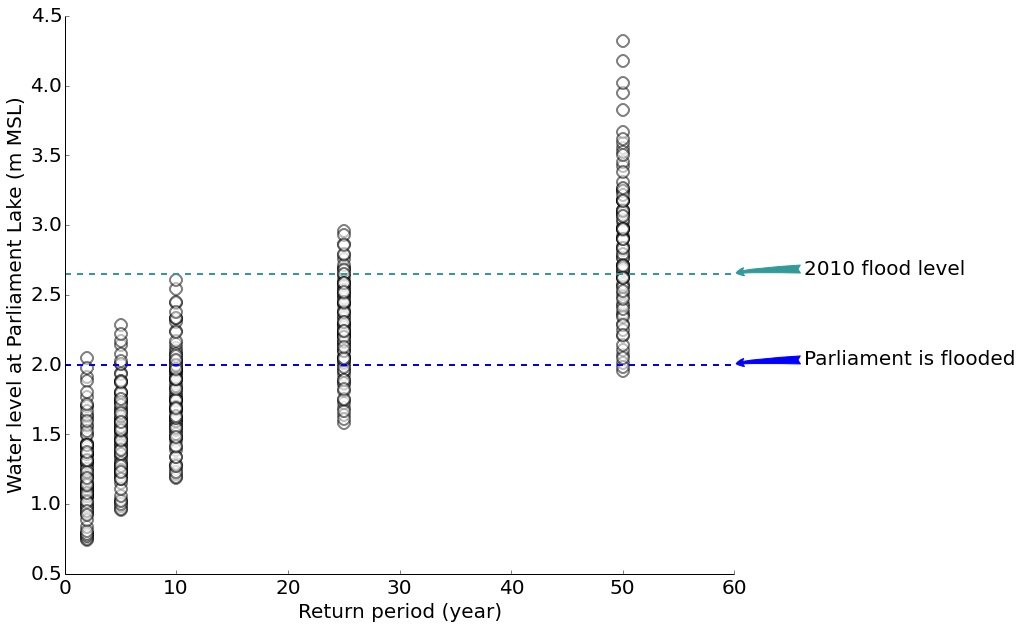

In [394]:
flood2010=2.65
color1="#0000FF"
color2='#339999'
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.figure(figsize=(12,10))
ax=plt.subplot(111)

for rp in subdata['return_period'].unique():
    subsubdata=subdata.ix[subdata['return_period']==rp,:]
    plt.plot([rp]*len(subsubdata),subsubdata['PARLIAMENT'],marker='o',markersize=12,markeredgewidth=2,linestyle='None',color='white',alpha=0.5,clip_on=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlabel("Return period (year)")
plt.ylabel("Water level at Parliament Lake (m MSL)")
#plt.savefig('water_level_parliament0.png',bbox_inches="tight",dpi=700)


plt.plot([0,60],[2]*2,color=color1,linestyle='--',linewidth=2)
plt.annotate('Parliament is flooded', xy=(60, 2),  xycoords='data',
                    xytext=(70, 0), textcoords='offset points',
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=color1, ec=color1,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )
#for rp in subdata['return_period'].unique():
    #subsubdata2=subdata.ix[(subdata['return_period']==rp)&(subdata['PARLIAMENT']>2),:]
    #plt.plot([rp]*len(subsubdata2),subsubdata2['PARLIAMENT'],marker='o',markersize=10,markeredgewidth=1,linestyle='None',color='white',alpha=0.5,markeredgecolor=color1,clip_on=False)
#plt.savefig('water_level_parliament1.png',bbox_inches="tight",dpi=700)

plt.plot([0,60],[flood2010]*2,color=color2,linestyle='--',linewidth=2)
plt.annotate('2010 flood level', xy=(60, flood2010),  xycoords='data',
                    xytext=(70, 0), textcoords='offset points',
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="fancy",
                                    fc=color2, ec=color2,
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )

#for rp in subdata['return_period'].unique():
    #subsubdata3=subdata.ix[(subdata['return_period']==rp)&(subdata['PARLIAMENT']>flood2010),:]
    #plt.plot([rp]*len(subsubdata3),subsubdata3['PARLIAMENT'],marker='o',markersize=10,markeredgewidth=1,linestyle='None',color='white',alpha=0.5,markeredgecolor=color2,clip_on=False)

#plt.savefig('water_level_parliament2.png',bbox_inches="tight",dpi=700)

#plt.plot(3,4.2,marker='x',markersize=9,markeredgewidth=1,linestyle='None',color='black',clip_on=False)
#plt.text(4.5,4.15,"number of people affected (thousands people)")
#for i in subdata.ix[notnull(subdata['cost']),:].index:
    #plt.plot(subdata.ix[i,'return_period'],subdata.ix[i,'PARLIAMENT'],marker='x',markersize=9,markeredgewidth=1,linestyle='None',color='black',clip_on=False)
    #plt.text(subdata.ix[i,'return_period']+1,subdata.ix[i,'PARLIAMENT']-0.05,str(int(round(subdata.ix[i,'Pop']/10**3))))

plt.savefig('water_level_parliament_simple.png',bbox_inches="tight",dpi=300)


In [ ]:
subdata.to_csv("C:\\Users\\julierozenberg\\Documents\\GitHub\\EMAworkbench\\src\\srilankaparl.csv",index=False)

## Calculates the impact of 100% wetland loss for each set of other conditions

In [ ]:
def diffwet(x):
    sel1=x['wetland_loss']==100
    sel2=x['wetland_loss']==0
    out=x.ix[sel1,varin1].values-x.ix[sel2,varin1].values
    return out[0]

charac_col=['return_period','climate_change','runoff','bndconditions']
wetlandimpact=subdata.groupby(charac_col).apply(lambda x:diffwet(x))
charac=subdata.groupby(charac_col).apply(lambda x:x[charac_col].head(1))
scenar=subdata.groupby(charac_col).apply(lambda x:x['scenario_number'].head(1))

In [ ]:
new_data=concat([scenar,charac],axis=1)
new_data.index=range(len(new_data))
wetlandimpact.index=range(len(wetlandimpact))
new_data['wetlandimpact']=wetlandimpact

In [ ]:
new_data['wetlandimpact'].describe()

In [ ]:
formula="wetlandimpact ~ return_period + climate_change + runoff  + bndconditions"
olsmodel1=sm.ols(formula,data=new_data).fit()
res1=olsmodel1.params
table=anova_lm(olsmodel1)
table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
table=table.sort(['sum_sq'],ascending=False)
print(table)

#### look at max impact of wetlands for each return period

In [ ]:
for rp in subdata['return_period'].unique():
    subsubdata=new_data.ix[new_data['return_period']==rp,:]
    plt.plot([rp]*len(subsubdata),subsubdata['wetlandimpact'],marker='o',linestyle='None')
    id=subsubdata['wetlandimpact']==subsubdata['wetlandimpact'].max()
    print(subsubdata.loc[id,['climate_change','runoff','bndconditions','scenario_number','return_period']])

print("--- for CMC ---")
for rp in subdata['return_period'].unique():
    subsubdata=new_data.ix[new_data['return_period']==rp,:]
    id2=(subsubdata['climate_change']==0)&(subsubdata['runoff']==0.6)&(subsubdata['bndconditions']==1)
    plt.plot(rp,subsubdata.loc[id2,'wetlandimpact'],marker='x',linestyle='None',color='black',markersize=12)
    print(subsubdata.loc[id2,['climate_change','runoff','bndconditions','scenario_number','return_period']])

## Chooses scenarios for CMC. Creates output with scenarios and cross sections of interest for CMC

In [ ]:
cmc_cols=['DEHIWARA CNL(1003.8000)', 'KIRILLAPONE3(2156.1499)', 'KIRILLAPONE2(934.0800)', 'TORRINGTON_B01(33.0600).1', 'SERPENTINE(40.0000)', 'ST.SEBASTIAN_SOUTH_DIVERSION(200.0000)', 'SEBASTIAN', 'MAIN DRAIN(1177.1600)']
cmcdata=data[cmc_cols+['return_period','wetland_loss','climate_change','runoff','bndconditions','scenario_number']].copy()
cmcdata.rename(columns={'DEHIWARA CNL(1003.8000)': 'DEHIWARA','KIRILLAPONE3(2156.1499)': 'KIRILLAPONE3',
                        'KIRILLAPONE2(934.0800)':'KIRILLAPONE2','TORRINGTON_B01(33.0600).1':'TORRINGTON_B01',
                        'SERPENTINE(40.0000)':'SERPENTINE', 'ST.SEBASTIAN_SOUTH_DIVERSION(200.0000)':'SEBASTIAN_SOUTH_DIVERSION',
                        'MAIN DRAIN(1177.1600)':'MAIN_DRAIN'}, inplace=True)


In [ ]:
for crosssec in cmcdata.columns-['return_period','wetland_loss','climate_change','runoff','bndconditions','scenario_number']:
    formula=crosssec+" ~ return_period + wetland_loss + climate_change + runoff  + bndconditions"
    olsmodel=sm.ols(formula,data=cmcdata).fit()
    predictions=olsmodel.predict(cmcdata)
    cmcdata.loc[cmcdata[crosssec].isnull().values,crosssec]=predictions[cmcdata[crosssec].isnull().values]

In [ ]:
select=(cmcdata['climate_change']==0)&(cmcdata['runoff']==0.6)&(cmcdata['bndconditions']==1)&((cmcdata['wetland_loss']==100)|(cmcdata['wetland_loss']==0))
cmc_scenarios=cmcdata.ix[select,:]
cmc_scenarios.to_csv("cmc_scenarios.csv")


### check that wetlands have an impact on those crosssections

In [ ]:
allcols=cmcdata.columns-['return_period','wetland_loss','climate_change','runoff','bndconditions','scenario_number']
thecol=allcols[2]
def diffwet(x):
    sel1=x['wetland_loss']==100
    sel2=x['wetland_loss']==0
    out=x.ix[sel1,thecol].values-x.ix[sel2,thecol].values
    return out[0]

charac_col=['return_period','climate_change','runoff','bndconditions']
wetlandimpact=cmcdata.groupby(charac_col).apply(lambda x:diffwet(x))
charac=cmcdata.groupby(charac_col).apply(lambda x:x[charac_col].head(1))
scenar=cmcdata.groupby(charac_col).apply(lambda x:x['scenario_number'].head(1))

new_cmcdata=concat([scenar,charac],axis=1)
new_cmcdata.index=range(len(new_cmcdata))
wetlandimpact.index=range(len(wetlandimpact))
new_cmcdata['wetlandimpact']=wetlandimpact

In [ ]:
for rp in new_cmcdata['return_period'].unique():
    subsubdata=new_cmcdata.ix[new_cmcdata['return_period']==rp,:]
    plt.plot([rp]*len(subsubdata),subsubdata['wetlandimpact'],marker='o',linestyle='None')
    id=subsubdata['wetlandimpact']==subsubdata['wetlandimpact'].max()
    print(subsubdata.loc[id,['climate_change','runoff','bndconditions','scenario_number','return_period']])

print("--- for CMC ---")
for rp in new_cmcdata['return_period'].unique():
    subsubdata=new_cmcdata.ix[new_cmcdata['return_period']==rp,:]
    id2=(subsubdata['climate_change']==0)&(subsubdata['runoff']==0.6)&(subsubdata['bndconditions']==1)
    plt.plot(rp,subsubdata.loc[id2,'wetlandimpact'],marker='x',linestyle='None',color='black',markersize=12)
    print(subsubdata.loc[id2,['climate_change','runoff','bndconditions','scenario_number','return_period']])